# Trials

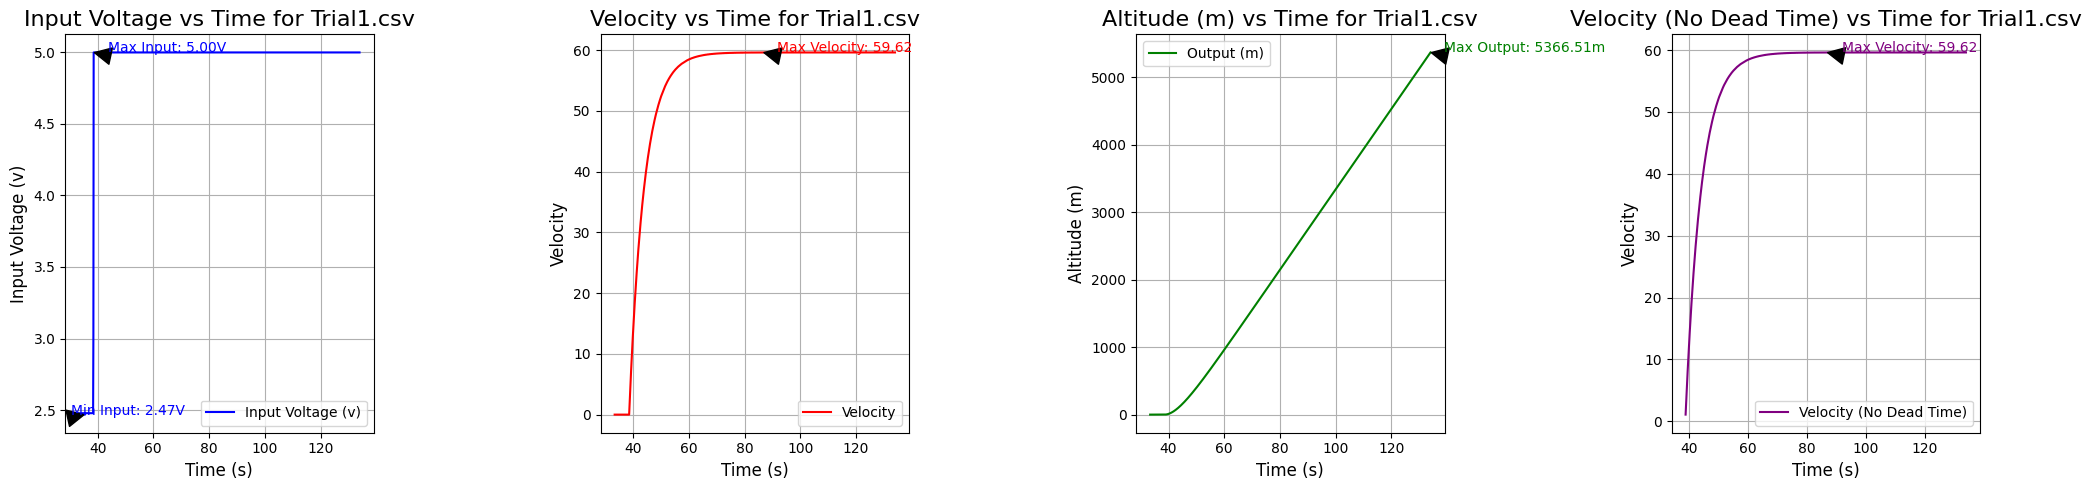

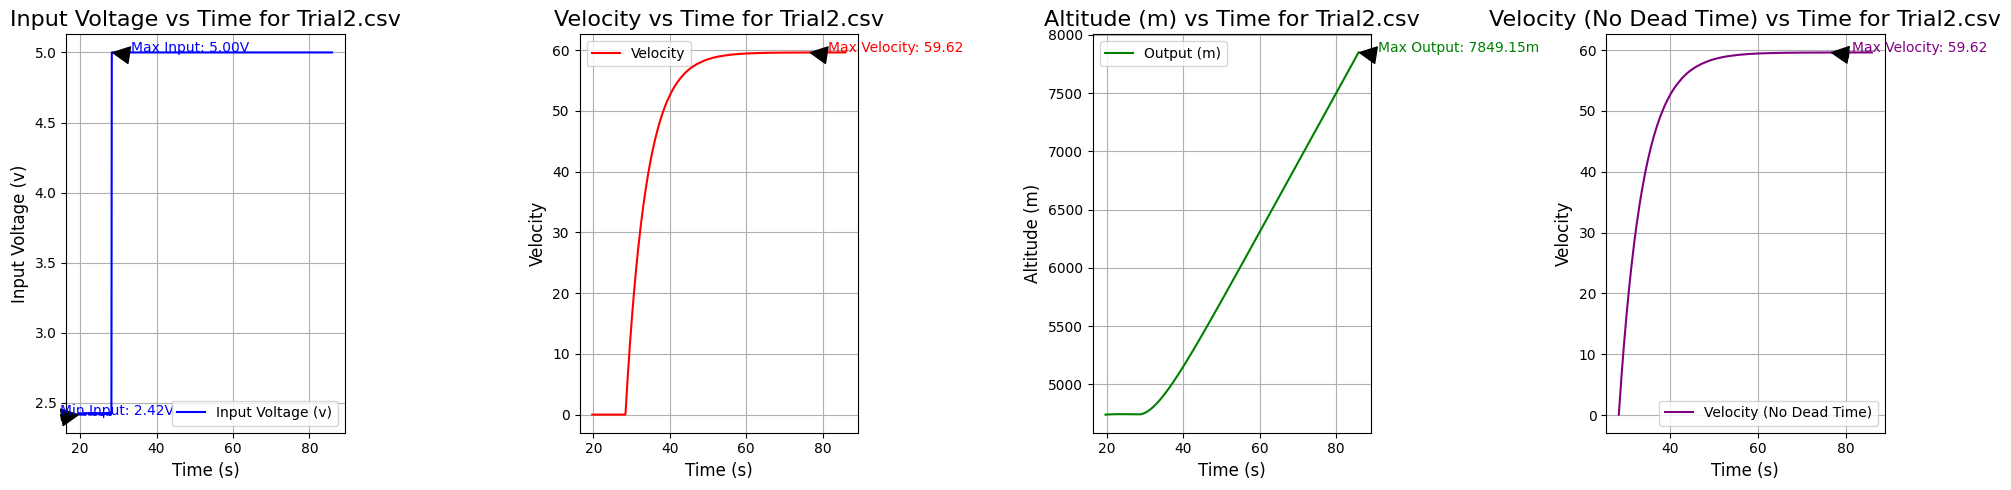

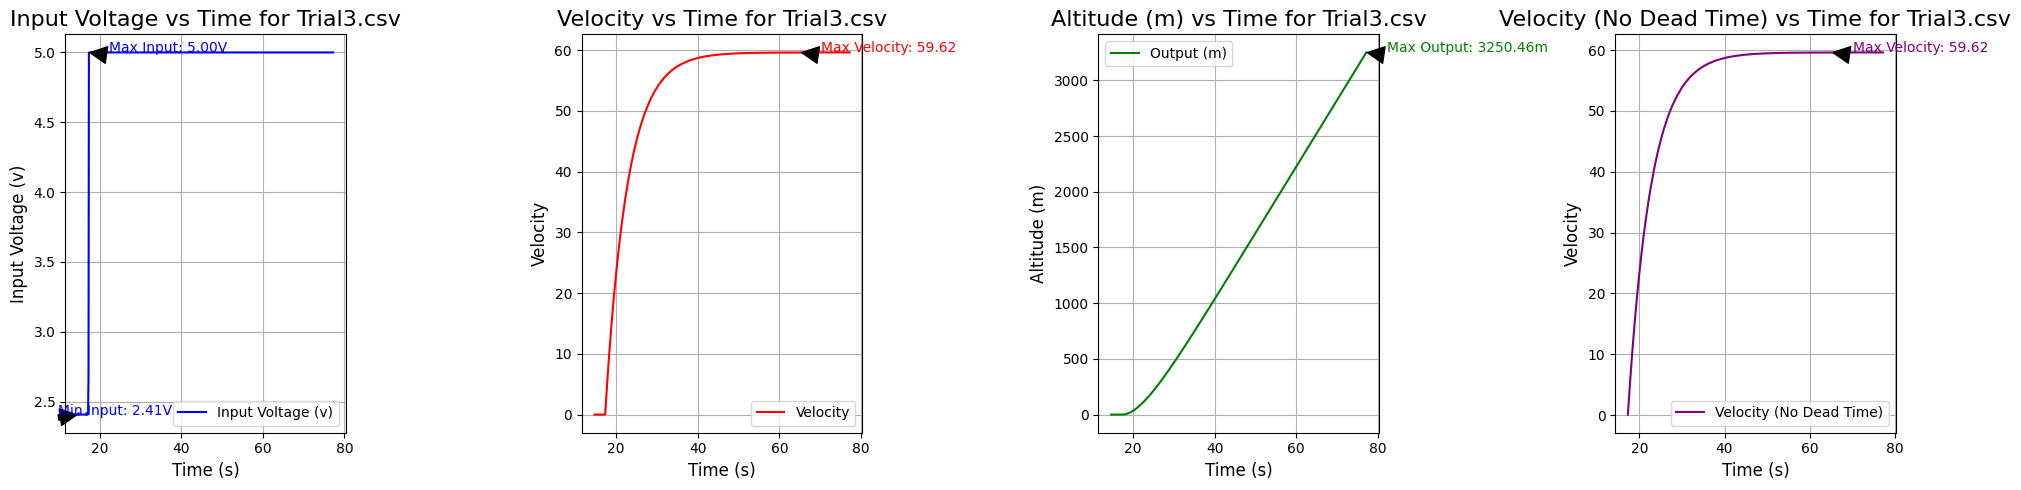

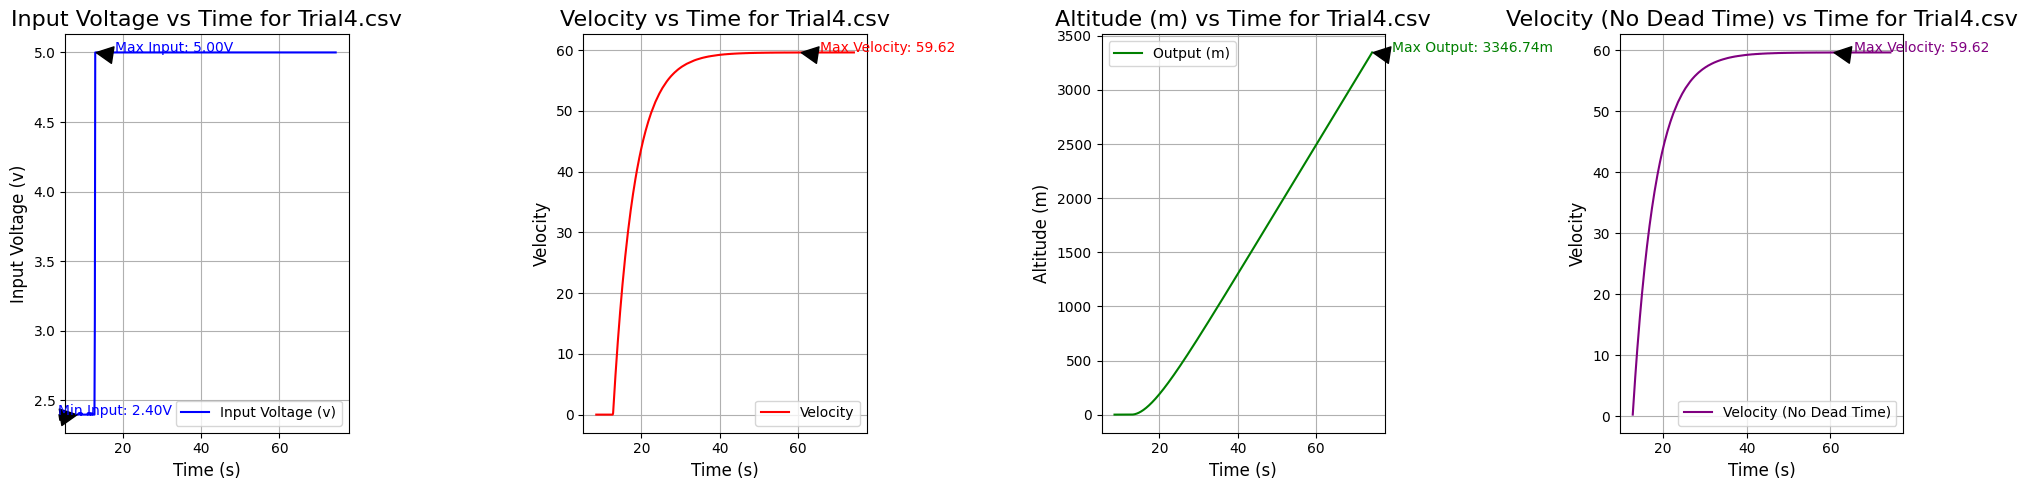

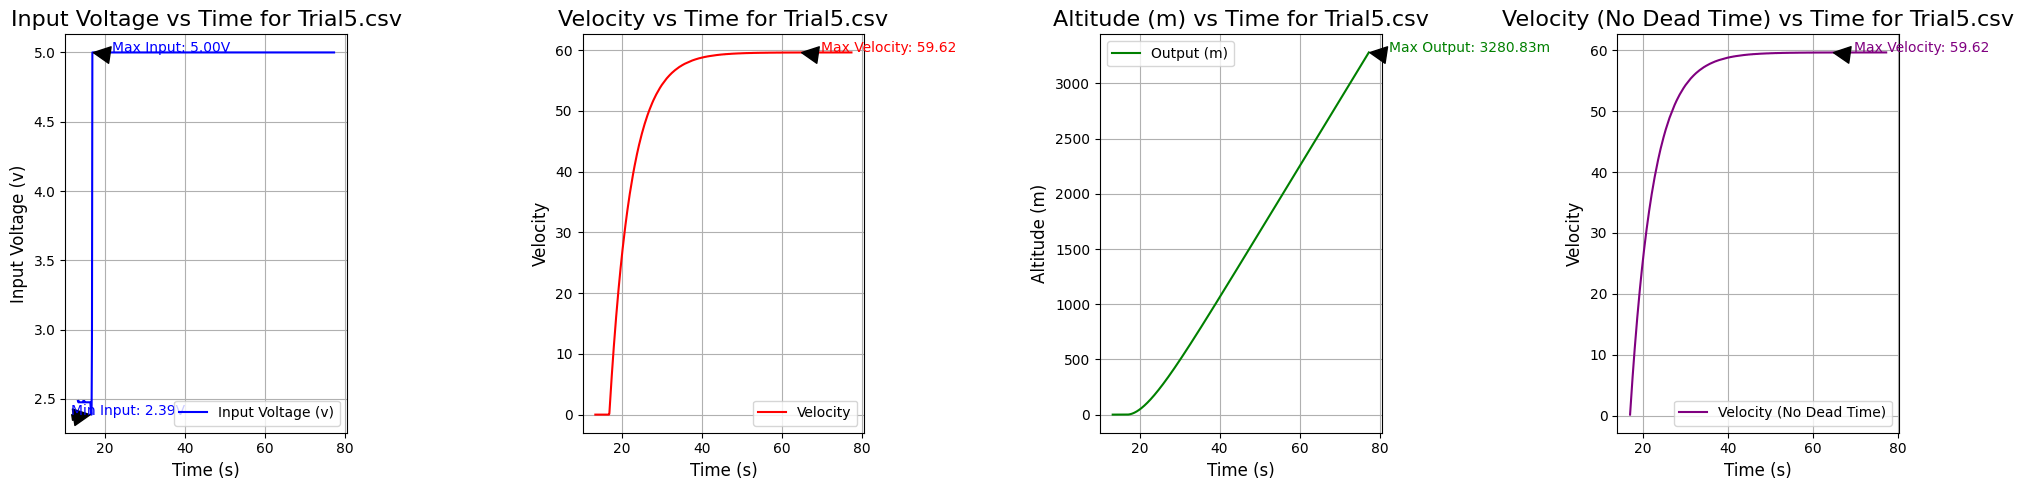

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a threshold for dead time (you can adjust this based on your data)
dead_time_threshold = 0.01  # Any velocity below this value will be considered dead time

# List of file names for the trials
trial_files = ['Trial1.csv', 'Trial2.csv', 'Trial3.csv', 'Trial4.csv', 'Trial5.csv']

# Loop through each trial file and plot separately
for trial_file in trial_files:
    # Load each CSV file into a DataFrame
    data = pd.read_csv(trial_file)
    
    # Extract the required columns
    time = data['Time(s)']
    input_v = data['Input(v)']
    velocity = data['Velocity']
    output_m = data['Output(m)']
    
    # Create a new figure with subplots arranged horizontally
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns
    
    # Plot 1: Input(v) vs Time(s)
    axs[0].plot(time, input_v, label='Input Voltage (v)', color='blue', linestyle='-')
    
    # Add annotations for max and min input voltage
    max_input = input_v.max()
    min_input = input_v.min()
    axs[0].annotate(f'Max Input: {max_input:.2f}V', xy=(time[input_v.idxmax()], max_input),
                    xytext=(time[input_v.idxmax()] + 5, max_input),
                    arrowprops=dict(facecolor='black', shrink=0.05),
                    fontsize=10, color='blue')
    axs[0].annotate(f'Min Input: {min_input:.2f}V', xy=(time[input_v.idxmin()], min_input),
                    xytext=(time[input_v.idxmin()] - 5, min_input),
                    arrowprops=dict(facecolor='black', shrink=0.05),
                    fontsize=10, color='blue')
    
    axs[0].set_title(f'Input Voltage vs Time for {trial_file}', fontsize=16)
    axs[0].set_xlabel('Time (s)', fontsize=12)
    axs[0].set_ylabel('Input Voltage (v)', fontsize=12)
    axs[0].legend()
    axs[0].grid(True)
    
    # Plot 2: Velocity vs Time(s)
    axs[1].plot(time, velocity, label='Velocity', color='red', linestyle='-')
    
    # Add annotation for the max velocity
    max_velocity = velocity.max()
    axs[1].annotate(f'Max Velocity: {max_velocity:.2f}', xy=(time[velocity.idxmax()], max_velocity),
                    xytext=(time[velocity.idxmax()] + 5, max_velocity),
                    arrowprops=dict(facecolor='black', shrink=0.05),
                    fontsize=10, color='red')
    
    axs[1].set_title(f'Velocity vs Time for {trial_file}', fontsize=16)
    axs[1].set_xlabel('Time (s)', fontsize=12)
    axs[1].set_ylabel('Velocity', fontsize=12)
    axs[1].legend()
    axs[1].grid(True)
    
    # Plot 3: Output(m) vs Time(s)
    axs[2].plot(time, output_m, label='Output (m)', color='green', linestyle='-')
    
    # Add annotation for the max output
    max_output = output_m.max()
    axs[2].annotate(f'Max Output: {max_output:.2f}m', xy=(time[output_m.idxmax()], max_output),
                    xytext=(time[output_m.idxmax()] + 5, max_output),
                    arrowprops=dict(facecolor='black', shrink=0.05),
                    fontsize=10, color='green')
    
    axs[2].set_title(f'Altitude (m) vs Time for {trial_file}', fontsize=16)
    axs[2].set_xlabel('Time (s)', fontsize=12)
    axs[2].set_ylabel('Altitude (m)', fontsize=12)
    axs[2].legend()
    axs[2].grid(True)
    
    # Plot 4: Velocity without dead time vs Time(s)
    velocity_no_dead_time = velocity[velocity > dead_time_threshold]
    time_no_dead_time = time[velocity > dead_time_threshold]
    
    axs[3].plot(time_no_dead_time, velocity_no_dead_time, label='Velocity (No Dead Time)', color='purple', linestyle='-')
    
    # Add annotation for max velocity without dead time
    max_velocity_no_dead = velocity_no_dead_time.max()
    axs[3].annotate(f'Max Velocity: {max_velocity_no_dead:.2f}', 
                     xy=(time_no_dead_time[velocity_no_dead_time.idxmax()], max_velocity_no_dead),
                     xytext=(time_no_dead_time[velocity_no_dead_time.idxmax()] + 5, max_velocity_no_dead),
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     fontsize=10, color='purple')
    
    axs[3].set_title(f'Velocity (No Dead Time) vs Time for {trial_file}', fontsize=16)
    axs[3].set_xlabel('Time (s)', fontsize=12)
    axs[3].set_ylabel('Velocity', fontsize=12)
    axs[3].legend()
    axs[3].grid(True)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Display all plots in one figure
    plt.show()


# System Validation

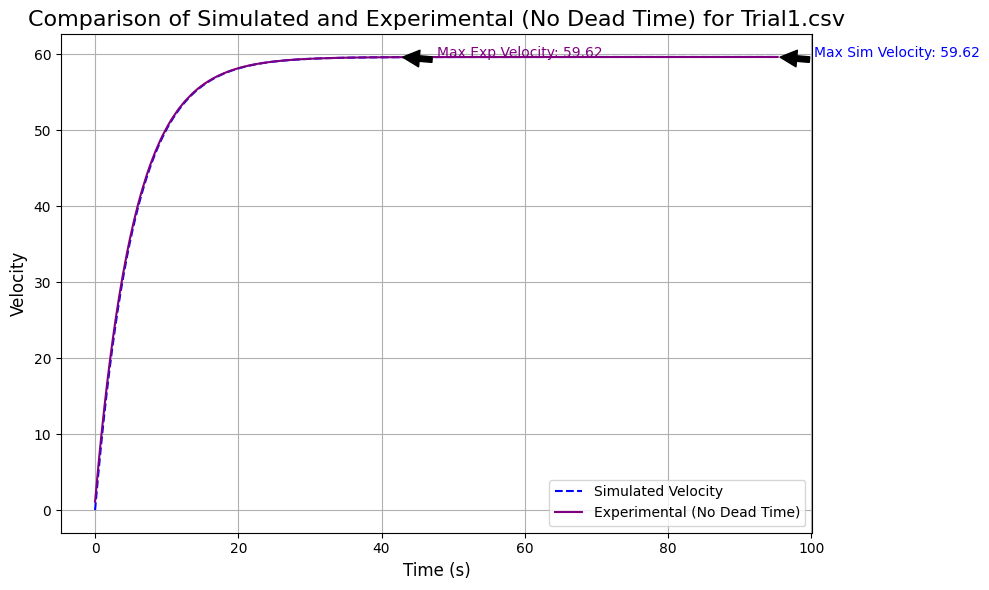

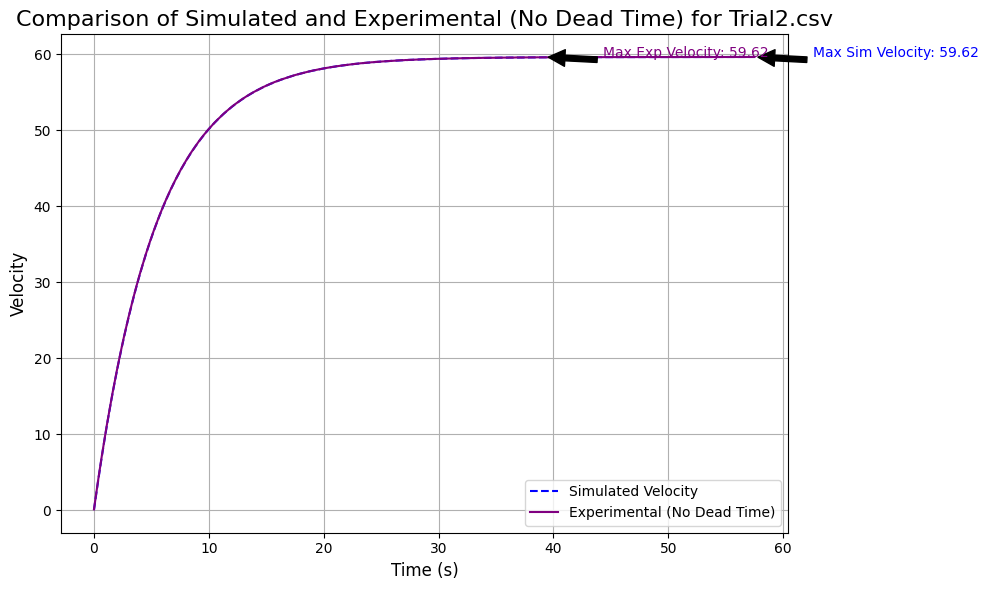

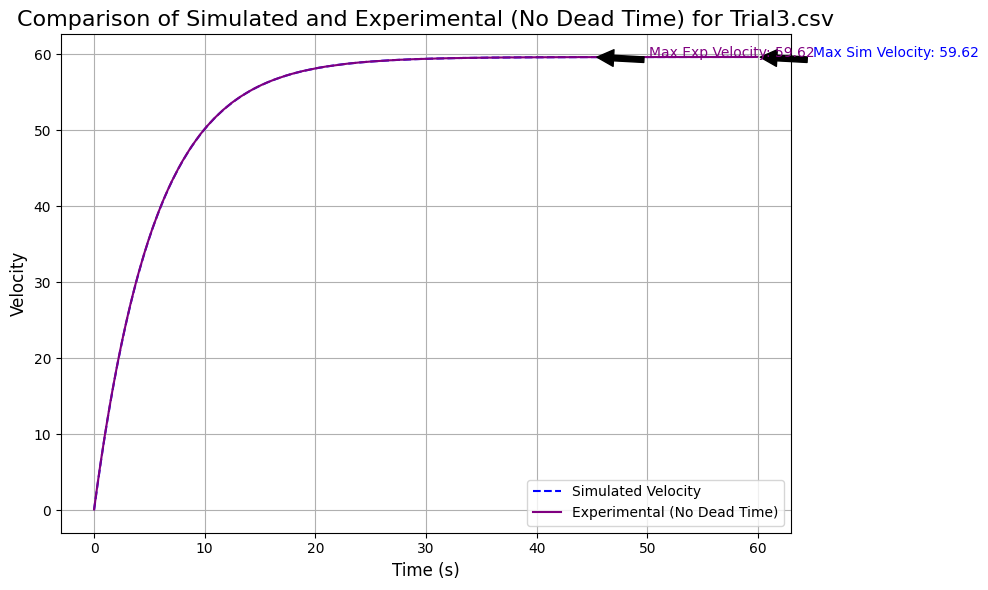

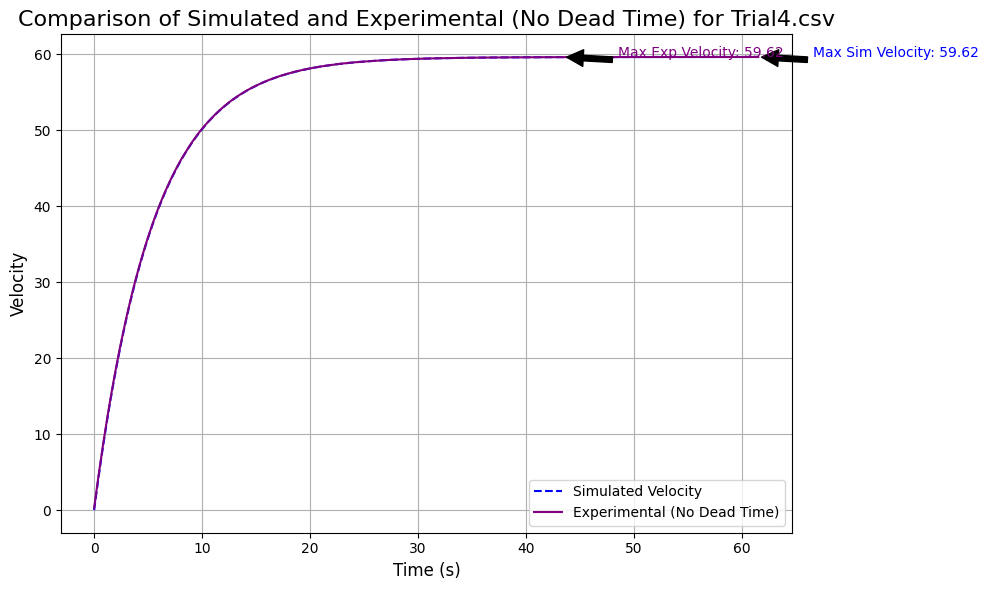

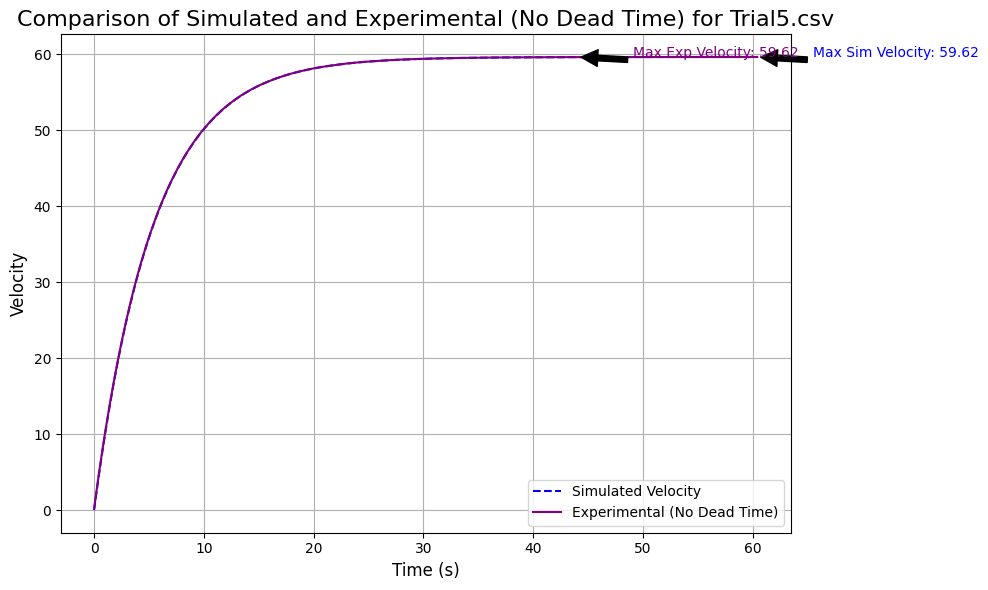

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# Define a threshold for dead time (adjust based on your data)
dead_time_threshold = 0.01  # Any velocity below this value will be considered dead time

# Define the updated transfer function G(s) = 59.62 / (5.44s + 1)
num = [59.62]
den = [5.44, 1]
system = signal.TransferFunction(num, den)

# Time vector for the simulation (same time scale as your experimental data)
sim_time = np.linspace(0, 100, 1000)  # Adjust time range and resolution as needed

# Simulate the step response of the transfer function
_, sim_velocity = signal.step(system, T=sim_time)

# List of experimental file names for the trials
trial_files = ['Trial1.csv', 'Trial2.csv', 'Trial3.csv', 'Trial4.csv', 'Trial5.csv']

# Loop through each trial file and compare experimental and simulated responses
for trial_file in trial_files:
    # Load each experimental CSV file into a DataFrame
    exp_data = pd.read_csv(trial_file)
    
    # Extract the required columns for experimental data
    time_exp = exp_data['Time(s)']
    velocity_exp = exp_data['Velocity']
    
    # Remove dead time from experimental data
    velocity_exp_no_dead_time = velocity_exp[velocity_exp > dead_time_threshold]
    time_exp_no_dead_time = time_exp[velocity_exp > dead_time_threshold]
    
    # Shift experimental time to align with simulated time
    time_shift_exp = time_exp_no_dead_time.iloc[0]  # Get the first non-zero time of the experimental data
    time_exp_no_dead_time_shifted = time_exp_no_dead_time - time_shift_exp  # Shift experimental time to start at t=0
    
    # Trim simulated response to match the experimental time duration
    sim_time_shifted = sim_time[:len(time_exp_no_dead_time_shifted)]
    sim_velocity_shifted = sim_velocity[:len(time_exp_no_dead_time_shifted)]
    
    # Create a new figure for comparison
    plt.figure(figsize=(10, 6))
    
    # Plot the simulated velocity vs the experimental velocity (shifted and no dead time)
    plt.plot(sim_time_shifted, sim_velocity_shifted, label='Simulated Velocity', color='blue', linestyle='--')
    plt.plot(time_exp_no_dead_time_shifted, velocity_exp_no_dead_time, label='Experimental (No Dead Time)', color='purple', linestyle='-')
    
    # Annotate maximum velocity points
    max_sim_velocity = sim_velocity_shifted.max()
    max_exp_velocity = velocity_exp_no_dead_time.max()

    # Annotate max points for simulated response
    max_sim_time_idx = sim_velocity_shifted.argmax()
    plt.annotate(f'Max Sim Velocity: {max_sim_velocity:.2f}', 
                 xy=(sim_time_shifted[max_sim_time_idx], max_sim_velocity),
                 xytext=(sim_time_shifted[max_sim_time_idx] + 5, max_sim_velocity),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=10, color='blue')

    # Annotate max points for experimental response
    max_exp_time_idx = velocity_exp_no_dead_time.argmax()
    plt.annotate(f'Max Exp Velocity: {max_exp_velocity:.2f}', 
                 xy=(time_exp_no_dead_time_shifted[max_exp_time_idx], max_exp_velocity),
                 xytext=(time_exp_no_dead_time_shifted[max_exp_time_idx] + 5, max_exp_velocity),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=10, color='purple')

    # Set titles and labels
    plt.title(f'Comparison of Simulated and Experimental (No Dead Time) for {trial_file}', fontsize=16)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Velocity', fontsize=12)
    plt.legend()
    plt.grid(True)
    
    # Display the plot
    plt.tight_layout()
    plt.show()


# %OS constraint

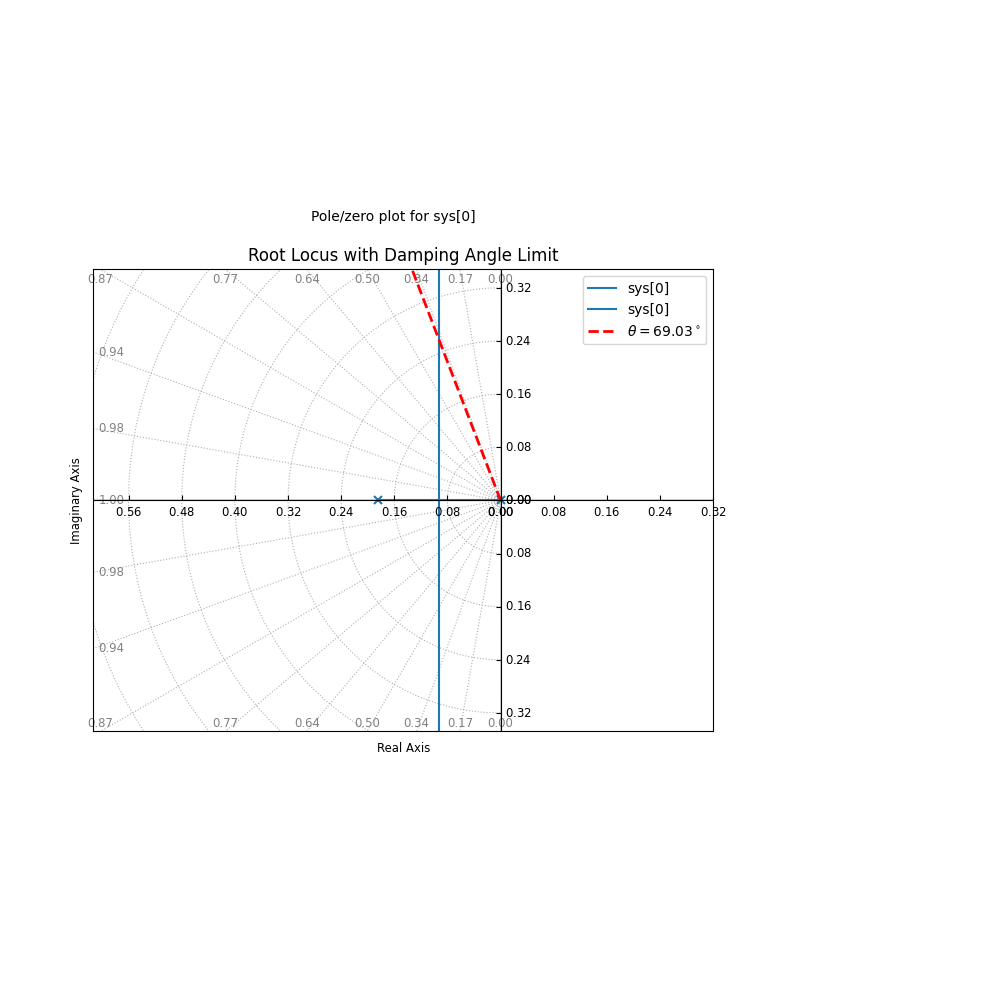

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Transfer function G(s) = K / (s(s+2)(s+3))
num = [23.85]  # numerator
den = [1, 0.184, 0]  # denominator s(s+2)(s+3) -> s^2 + s^0.184

# Create transfer function system
system = ctrl.TransferFunction(num, den)

# Root Locus plot
plt.figure(figsize=(8, 6))
ctrl.root_locus(system, grid=True)

# Adding a damping line for zeta = 0.358 (corresponding to theta = 69.03 degrees)
zeta_max = 0.358
theta_max_rad = np.arccos(zeta_max)
theta_max_deg = np.degrees(theta_max_rad)

# Plot damping line (angle = theta_max_deg)
plt.plot([0, -10 * np.cos(theta_max_rad)], [0, 10 * np.sin(theta_max_rad)], 'r--', lw=2, label=r'$\theta = 69.03^\circ$')

# Add labels and title
plt.title('Root Locus with Damping Angle Limit')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
